## Proyecto Machine Learning

#### El set de datos utilizado se llama [Forest Covertype Data Set](https://archive.ics.uci.edu/ml/datasets/Covertype). 
#### Los datos se obtienen de la web [University of California - Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php). 
#### La Fuente original de los datos y sus propietarios son: 
- Remote Sensing and GIS Program, Department of Forest Sciences. College of Natural Resources. Colorado State University. Fort Collins, CO  80523
(contact Jock A. Blackard, jblackard 'at' fs.fed.us or Dr. Denis J. Dean, denis.dean 'at' utdallas.edu) 

El archivo se descarga en formato .data (covtype.data) junto con un archivo en formato .info (covtype.info) que contiene información del dataset

![imagen](./img/forest.jpg)

##### **Objetivo**: Predecir el tipo de cobertura forestal a partir de variables cartográficas

**¿Para qué predecir la cobertura forestal?:** Los administradores de recursos naturales (natural resource managers, e.g. Ministerio de Medio Ambiente, Parques Nacionales, Ayuntamientos, Organizaciones de Conservación de la Naturaleza) requieren información descriptiva básica, incluidos datos de inventario de coberturas forestales, para respaldar sus procesos de toma de decisiones. Sin embargo, los administradores generalmente no cuentan con este tipo de datos para los terrenos que se encuentran fuera de su jurisdicción inmediata. Un método para obtener esta información es mediante el uso de modelos predictivos.

**Un poco de contexto:** 
- Los bosques cubren alrededor de un tercio de la superficie terrestre. Son un ecosistema fundamental. El cambio de la cobertura forestal es muy relevante para el ciclo global del carbono, los suministros de agua, la riqueza de la biodiversidad y para comprender las causas del cambio en el uso de la tierra.
- La cobertura forestal es el área de tierra cubierta por bosques. Es la tierra que se extiende por más de 0.5 hectáreas (50.000 $m^{2}$), dotada de árboles de una altura superior a 5 metros. 
- Se refiere a los árboles en su distribución natural, sin incluir bosque intervenido por el hombre o de uso urbano ni agropecuario. 
- El tipo de cobertura forestal suele referirse al tipo de bosque según las especies vegetales y flora más comunes o de mayor frecuencia de ocurrencia. Los tipos dependen del sistema de clasificación utilizado. 
- Algunos ejemplos de tipos de cobertura forestal: bosque de coníferas (hoja perenne), bosque deciduo (hoja caduca), bosque de ribera, bosque de pinos o bosque de abetos.

Carga de datos:

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import model_selection
from sklearn import preprocessing

In [3]:
#Forest cover type dataset:
file_path = "./data/raw/covtype.data"
raw_df = pd.read_csv(file_path, delimiter = ",")

raw_df.head() #sin nombre en las columnas

2596   51   3  258    0   510  221  232  148  6279  ...  0.34  0.35  0.36  \
0  2590   56   2  212   -6   390  220  235  151  6225  ...     0     0     0   
1  2804  139   9  268   65  3180  234  238  135  6121  ...     0     0     0   
2  2785  155  18  242  118  3090  238  238  122  6211  ...     0     0     0   
3  2595   45   2  153   -1   391  220  234  150  6172  ...     0     0     0   
4  2579  132   6  300  -15    67  230  237  140  6031  ...     0     0     0   

   0.37  0.38  0.39  0.40  0.41  0.42  5  
0     0     0     0     0     0     0  5  
1     0     0     0     0     0     0  2  
2     0     0     0     0     0     0  2  
3     0     0     0     0     0     0  5  
4     0     0     0     0     0     0  2  

[5 rows x 55 columns]

- Al cargar los datos se observa que no contiene el nombre de las columnas

In [3]:
raw_df.shape #581.012 filas, 55 columnas. 

(581011, 55)

- A partir de 1.0000 filas se considera buen dataset para aplicar Machine Learning. 
- 55 columnas son muchas columnas. ¿De dónde salen tantas?

- Se consulta el archivo descargado 'covtype.info' para encontrar información acerca de las columnas e información general del dataset. 
- Este archivo proporciona el nombre de las columnas, su tipo , la unidad de medida y una breve descripción. 
- El tipo de cobertura forestal (Cover_Type) es el problema de clasificación. 
- El orden de este listado corresponde al orden de números a lo largo de las filas de la base de datos.


In [11]:
# Description of the dataset

# Column name                                                                          #Description      
#-----------------------------------------------------------------------------------------------------------------------------------
# Elevation                               quantitative    meters                       Elevation in meters
# Aspect                                  quantitative    azimuth                      Aspect in degrees azimuth
# Slope                                   quantitative    degrees                      Slope in degrees
# Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
# Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
# Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
# Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
# Hillshade_Noon                          quantitative    0 to 255 index               Hillshade index at noon, summer soltice
# Hillshade_3pm                           quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
# Horizontal_Distance_To_Fire_Points      quantitative    meters                       Horz Dist to nearest wildfire ignition points
# Wilderness_Area (4 binary columns)      qualitative     0 (absence) or 1 (presence)  Wilderness area designation
# Soil_Type (40 binary columns)           qualitative     0 (absence) or 1 (presence)  Soil Type designation
# Cover_Type (7 types)                    integer         1 to 7                       Forest Cover Type designation

Información relevante ('covtype.info'):
- La zona de estudio es el Bosque Nacional Roosevelt al norte de Colorado. Esta zona incluye cuatro áreas silvestres (Wilderness_Area):
    1. Rawah (Area 1)  
    2. Neota (Area 2) 
    3. Comanche Peak (Area 3)
    4. Cache la Poudre (Area 4) 

        ![imagen](./img/study_area.jpg)

- Los datos están sin escalar.
- Contiene 10 variables cuantitativas, 4 columnas binarias (0 o 1) de áreas silvestres (Wilderness_Area) y **40 columnas binarias del tipo de suelo (Soil_Type)**. ¡Ya sabemos por qué hay tantas columnas! 
- A continuación se explica la designación de códigos de las variables Wilderness_Area y Soil_Type:

In [ ]:
# Code Designations:

# Wilderness Areas:  1 -- Rawah Wilderness Area
#                    2 -- Neota Wilderness Area
#                    3 -- Comanche Peak Wilderness Area
#                    4 -- Cache la Poudre Wilderness Area

#Soil Types: 1 to 40 : based on the USFS Ecological Landtype Units (ELUs) for this study area:

#  Study Code USFS ELU Code			Description
#	 1	   2702		Cathedral family - Rock outcrop complex, extremely stony.
#	 2	   2703		Vanet - Ratake families complex, very stony.
#	 3	   2704		Haploborolis - Rock outcrop complex, rubbly.
#	 4	   2705		Ratake family - Rock outcrop complex, rubbly.
#	 5	   2706		Vanet family - Rock outcrop complex complex, rubbly.
#	 6	   2717		Vanet - Wetmore families - Rock outcrop complex, stony.
#	 7	   3501		Gothic family.
#	 8	   3502		Supervisor - Limber families complex.
#	 9	   4201		Troutville family, very stony.
#	10	   4703		Bullwark - Catamount families - Rock outcrop complex, rubbly.
#	11	   4704		Bullwark - Catamount families - Rock land complex, rubbly.
#	12	   4744		Legault family - Rock land complex, stony.
#	13	   4758		Catamount family - Rock land - Bullwark family complex, rubbly.
#	14	   5101		Pachic Argiborolis - Aquolis complex.
#	15	   5151		unspecified in the USFS Soil and ELU Survey.
#	16	   6101		Cryaquolis - Cryoborolis complex.
#	17	   6102		Gateview family - Cryaquolis complex.
#	18	   6731		Rogert family, very stony.
#	19	   7101		Typic Cryaquolis - Borohemists complex.
#	20	   7102		Typic Cryaquepts - Typic Cryaquolls complex.
#	21	   7103		Typic Cryaquolls - Leighcan family, till substratum complex.
#	22	   7201		Leighcan family, till substratum, extremely bouldery.
#	23	   7202		Leighcan family, till substratum - Typic Cryaquolls complex.
#	24	   7700		Leighcan family, extremely stony.
#	25	   7701		Leighcan family, warm, extremely stony.
#	26	   7702		Granile - Catamount families complex, very stony.
#	27	   7709		Leighcan family, warm - Rock outcrop complex, extremely stony.
#	28	   7710		Leighcan family - Rock outcrop complex, extremely stony.
#	29	   7745		Como - Legault families complex, extremely stony.
#	30	   7746		Como family - Rock land - Legault family complex, extremely stony.
#	31	   7755		Leighcan - Catamount families complex, extremely stony.
#	32	   7756		Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
#	33	   7757		Leighcan - Catamount families - Rock outcrop complex, extremely stony.
#	34	   7790		Cryorthents - Rock land complex, extremely stony.
#	35	   8703		Cryumbrepts - Rock outcrop - Cryaquepts complex.
#	36	   8707		Bross family - Rock land - Cryumbrepts complex, extremely stony.
#	37	   8708		Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
#	38	   8771		Leighcan - Moran families - Cryaquolls complex, extremely stony.
#	39	   8772		Moran family - Cryorthents - Leighcan family complex, extremely stony.
#	40	   8776		Moran family - Cryorthents - Rock land complex, extremely stony.

Aclaración de las variables:
- 'Aspect': En cartografía, el acimut es el ángulo de una dirección contado en el sentido de las agujas del reloj a partir del norte geográfico. El acimut de un punto hacia el este es de 90 grados y hacia el oeste de 270 grados sexagesimales. El acimut sirve para determinar la orientación de un sistema de triangulación
- 'Hillshade': La sombra y la luz son tonos de grises asociados a números enteros, de 0 a 255 (aumenta de negro a blanco). Técnica que permite visualizar terreno en función de una fuente de luz y de la pendiente y la orientación de la superficie de elevación. 

La variable a predecir es una clase del tipo de cobertura forestal. Son 7 clases:
1. Conífera/Abeto (Spruce/Fir)
2. Pino Lodgepole (Lodgepole Pine)
3. Pino Ponderosa (Ponderosa Pine)
4. Álamo/Sauce (Cottonwood/Willow)
5. Álamo temblón (Aspen)
6. Abeto de Douglas (Douglas-fir)
7. Krummholz (tipo de vegetación atrofiada y deformada)

Ahora, conociendo las columnas, se procede a añadir los nombres de las columnas al dataset. Primero las 40 columnas correspondientes al tipo de suelo, y después el resto

In [4]:
#Para crear los nombres de las columnas de las 40 variables binarias del tipo de suelo:

col_names = []
soil_types = np.arange(1,41,1)

for i in soil_types:
    query = 'ST_' + str(i)
    col_names.append(query)

print(col_names, end = '') # copiar lo que devuelve el print en la lista de nombres de columnas de la siguiente celda


['ST_1', 'ST_2', 'ST_3', 'ST_4', 'ST_5', 'ST_6', 'ST_7', 'ST_8', 'ST_9', 'ST_10', 'ST_11', 'ST_12', 'ST_13', 'ST_14', 'ST_15', 'ST_16', 'ST_17', 'ST_18', 'ST_19', 'ST_20', 'ST_21', 'ST_22', 'ST_23', 'ST_24', 'ST_25', 'ST_26', 'ST_27', 'ST_28', 'ST_29', 'ST_30', 'ST_31', 'ST_32', 'ST_33', 'ST_34', 'ST_35', 'ST_36', 'ST_37', 'ST_38', 'ST_39', 'ST_40']

In [5]:
colnames = ['Elevation', 'Aspect', 'Slope', 'Horiz_Dist_Hydro', 'Vert_Dist_Hydro', 
            'Horiz_Dist_Road', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horiz_Dist_Fire', 
            'Rawah_Wilderness_Area', 'Neota_Wilderness_Area', 'Comanche_Peak_Wilderness_Area', 'Cache_la_Poudre_Wilderness_Area',
            'ST_1', 'ST_2', 'ST_3', 'ST_4', 'ST_5', 'ST_6', 'ST_7', 'ST_8', 'ST_9', 'ST_10', 'ST_11', 'ST_12', 'ST_13', 'ST_14', 'ST_15',
            'ST_16', 'ST_17', 'ST_18', 'ST_19', 'ST_20', 'ST_21', 'ST_22', 'ST_23', 'ST_24', 'ST_25', 'ST_26', 'ST_27', 'ST_28', 'ST_29', 
            'ST_30', 'ST_31', 'ST_32', 'ST_33', 'ST_34', 'ST_35', 'ST_36', 'ST_37', 'ST_38', 'ST_39', 'ST_40', 
            'Forest_Cover_Type'] 

#Sobreescribir el dataset con el nombre de las columnas:
raw_df = pd.read_csv(file_path, delimiter = ",", names = colnames, header = None)
raw_df.head()

Elevation  Aspect  Slope  Horiz_Dist_Hydro  Vert_Dist_Hydro  \
0       2596      51      3               258                0   
1       2590      56      2               212               -6   
2       2804     139      9               268               65   
3       2785     155     18               242              118   
4       2595      45      2               153               -1   

   Horiz_Dist_Road  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0              510            221             232            148   
1              390            220             235            151   
2             3180            234             238            135   
3             3090            238             238            122   
4              391            220             234            150   

   Horiz_Dist_Fire  ...  ST_32  ST_33  ST_34  ST_35  ST_36  ST_37  ST_38  \
0             6279  ...      0      0      0      0      0      0      0   
1             6225  ...      0      0      0      0      0      0      0   
2             6121  ...      0      0      0      0      0      0      0   
3             6211  ...      0      0      0      0      0      0      0   
4             6172  ...      0      0      0      0      0      0      0   

   ST_39  ST_40  Forest_Cover_Type  
0      0      0                  5  
1      0      0                  5  
2      0      0                  2  
3      0      0                  2  
4      0      0                  5  

[5 rows x 55 columns]

## Exploratory Data Analysis

In [6]:
#Comprobar si existen NaN: 
raw_df.isnull().values.any() 

False

In [7]:
#Resumen de estadística básica para variables cuantitativas
raw_df[['Elevation', 'Aspect', 'Slope', 'Horiz_Dist_Hydro', 'Vert_Dist_Hydro', 'Horiz_Dist_Road',
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horiz_Dist_Fire']].describe()

Elevation         Aspect          Slope  Horiz_Dist_Hydro  \
count  581012.000000  581012.000000  581012.000000     581012.000000   
mean     2959.365301     155.656807      14.103704        269.428217   
std       279.984734     111.913721       7.488242        212.549356   
min      1859.000000       0.000000       0.000000          0.000000   
25%      2809.000000      58.000000       9.000000        108.000000   
50%      2996.000000     127.000000      13.000000        218.000000   
75%      3163.000000     260.000000      18.000000        384.000000   
max      3858.000000     360.000000      66.000000       1397.000000   

       Vert_Dist_Hydro  Horiz_Dist_Road  Hillshade_9am  Hillshade_Noon  \
count    581012.000000    581012.000000  581012.000000   581012.000000   
mean         46.418855      2350.146611     212.146049      223.318716   
std          58.295232      1559.254870      26.769889       19.768697   
min        -173.000000         0.000000       0.000000        0.000000   
25%           7.000000      1106.000000     198.000000      213.000000   
50%          30.000000      1997.000000     218.000000      226.000000   
75%          69.000000      3328.000000     231.000000      237.000000   
max         601.000000      7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horiz_Dist_Fire  
count  581012.000000    581012.000000  
mean      142.528263      1980.291226  
std        38.274529      1324.195210  
min         0.000000         0.000000  
25%       119.000000      1024.000000  
50%       143.000000      1710.000000  
75%       168.000000      2550.000000  
max       254.000000      7173.000000

In [45]:
#Check if there are negative values in the dataframe:
(raw_df.values < 0).any() #True

#How many negative values:
sum(n < 0 for n in raw_df.values.flatten()) #55.143 datos negativos

55143

In [8]:
# En el resumen de estadística de la celda anterior se observa que la variable 'Vert_Dist_Hydro' tiene valores mínimos que dan negativo. 
# No tiene sentido tener distancias negativas. Comprobar si los negativos de todo el dataframe son los mismos de la variable 'Vert_Dist_Hydro'

sum(n < 0 for n in raw_df['Vert_Dist_Hydro'].values.flatten()) #55.143. Sí, todos los negativos son de esta columna. Mejor eliminarlos.

55143

In [9]:
#Quedarse sólo con valores positivos
raw_df = raw_df[(raw_df['Vert_Dist_Hydro'] >= 0)]
print(raw_df.shape)

#Filas originales - Filas con números negativos:
581012 - 55143 #tiene que dar las mismas que el nuevo dataset sin valores negativos


(525869, 55)


525869

¿Cómo de correlacionadas están las variables independientes?

In [10]:
#Variables numéricas (en origen):

raw_df.columns[0:10]

Index(['Elevation', 'Aspect', 'Slope', 'Horiz_Dist_Hydro', 'Vert_Dist_Hydro',
       'Horiz_Dist_Road', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horiz_Dist_Fire'],
      dtype='object')

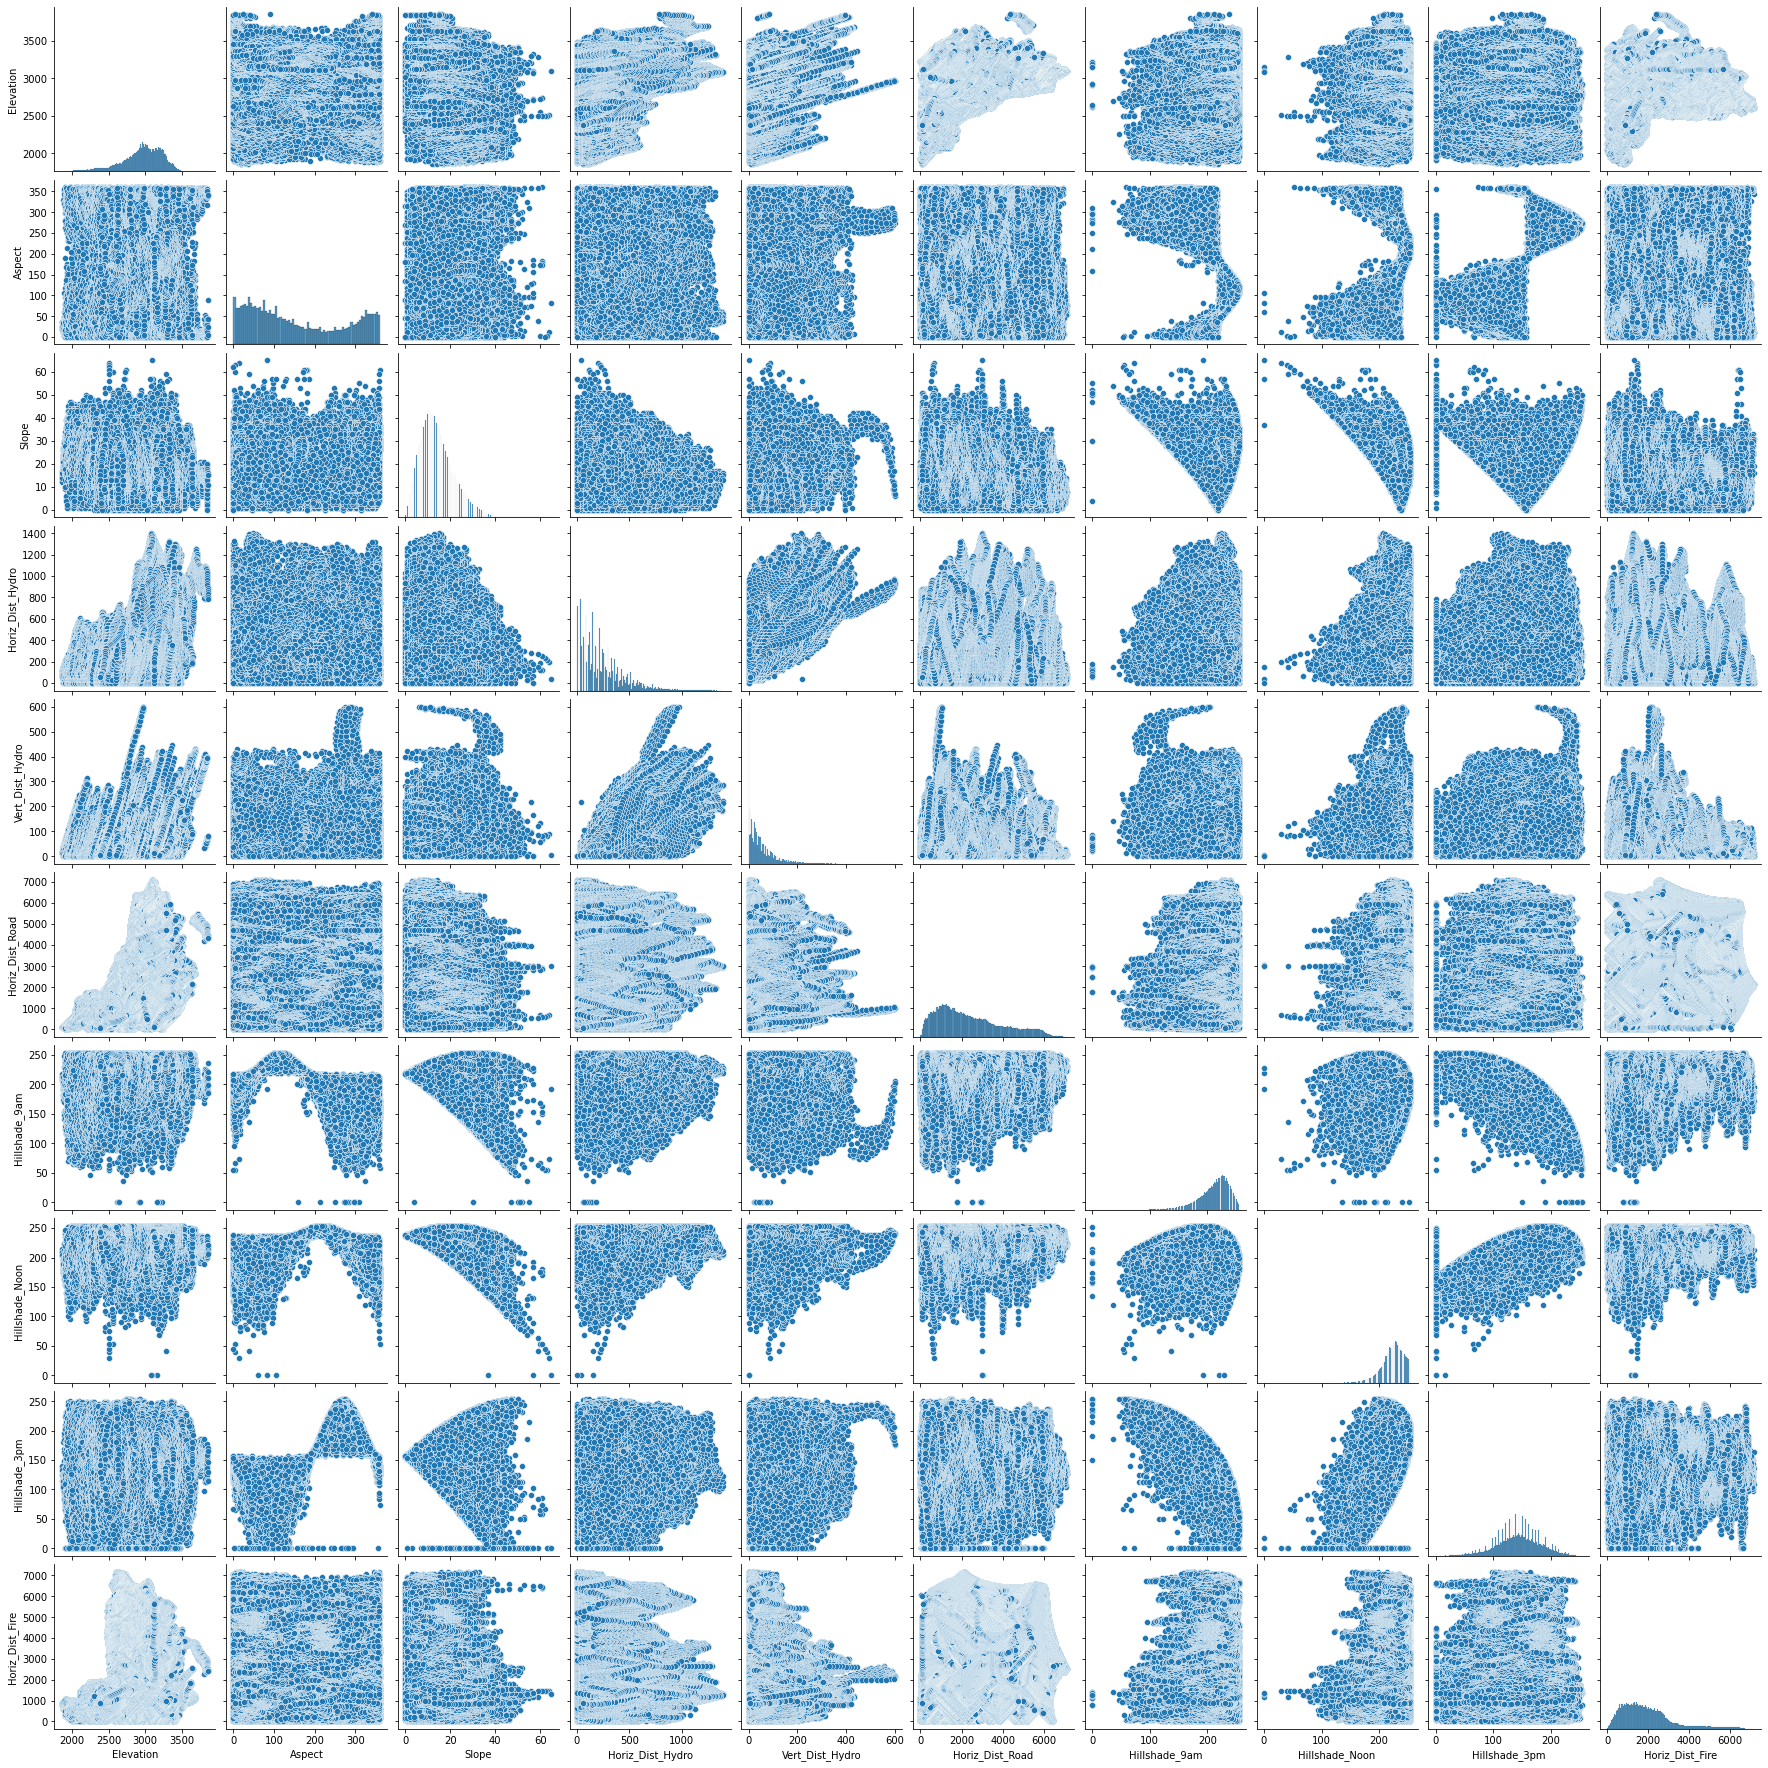

In [13]:
#Visualización de los datos usando un pairplot
#Exploración de tipos de relaciones en todo el conjunto de datos

sns.pairplot(raw_df, vars = raw_df.columns[0:10]) 

No se aprecia mucho la relación entre variables. Pintamos un histograma:

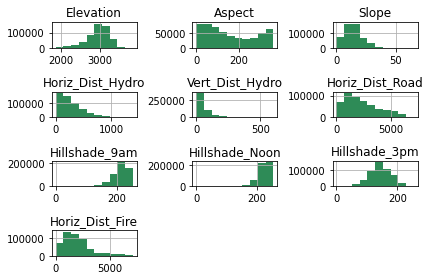

In [14]:
raw_df[['Elevation', 'Aspect', 'Slope', 'Horiz_Dist_Hydro', 'Vert_Dist_Hydro', 'Horiz_Dist_Road', 
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horiz_Dist_Fire',]].hist(color = 'seagreen')

plt.tight_layout()
plt.show() 

Probar con las correlaciones y un heatmap

In [15]:
#Muestra de la correlación entre todas las columnas numéricas
#Devuelve el valor de Pearson (1: correlación positiva, -1 correlación negativa, 0 sin correlación)

raw_df[['Elevation', 'Aspect', 'Slope', 'Horiz_Dist_Hydro', 'Vert_Dist_Hydro', 'Horiz_Dist_Road', 
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horiz_Dist_Fire',]].corr()

Elevation    Aspect     Slope  Horiz_Dist_Hydro  \
Elevation          1.000000  0.013969 -0.250012          0.318066   
Aspect             0.013969  1.000000  0.081393          0.007236   
Slope             -0.250012  0.081393  1.000000         -0.023063   
Horiz_Dist_Hydro   0.318066  0.007236 -0.023063          1.000000   
Vert_Dist_Hydro    0.113192  0.062069  0.297067          0.683750   
Horiz_Dist_Road    0.370670  0.019882 -0.221250          0.078082   
Hillshade_9am      0.114019 -0.579998 -0.336990         -0.011908   
Hillshade_Noon     0.211581  0.330777 -0.530559          0.052147   
Hillshade_3pm      0.061210  0.647790 -0.167578          0.044412   
Horiz_Dist_Fire    0.148560 -0.108932 -0.194742          0.053966   

                  Vert_Dist_Hydro  Horiz_Dist_Road  Hillshade_9am  \
Elevation                0.113192         0.370670       0.114019   
Aspect                   0.062069         0.019882      -0.579998   
Slope                    0.297067        -0.221250      -0.336990   
Horiz_Dist_Hydro         0.683750         0.078082      -0.011908   
Vert_Dist_Hydro          1.000000        -0.077398      -0.152819   
Horiz_Dist_Road         -0.077398         1.000000       0.045938   
Hillshade_9am           -0.152819         0.045938       1.000000   
Hillshade_Noon          -0.114309         0.189317       0.017993   
Hillshade_3pm            0.018173         0.097012      -0.780099   
Horiz_Dist_Fire         -0.086925         0.336599       0.135650   

                  Hillshade_Noon  Hillshade_3pm  Horiz_Dist_Fire  
Elevation               0.211581       0.061210         0.148560  
Aspect                  0.330777       0.647790        -0.108932  
Slope                  -0.530559      -0.167578        -0.194742  
Horiz_Dist_Hydro        0.052147       0.044412         0.053966  
Vert_Dist_Hydro        -0.114309       0.018173        -0.086925  
Horiz_Dist_Road         0.189317       0.097012         0.336599  
Hillshade_9am           0.017993      -0.780099         0.135650  
Hillshade_Noon          1.000000       0.588664         0.063891  
Hillshade_3pm           0.588664       1.000000        -0.046261  
Horiz_Dist_Fire         0.063891      -0.046261         1.000000

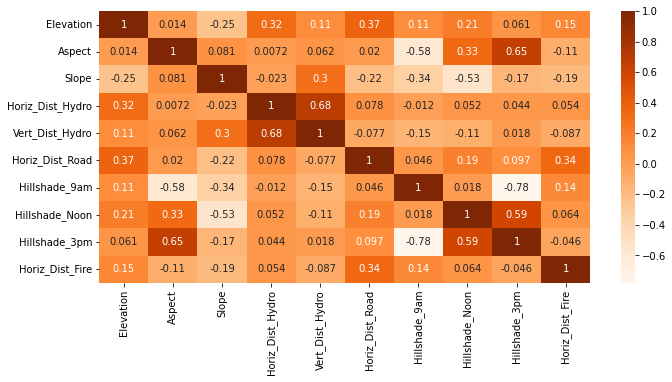

In [16]:
#Muestra de la correlación usando un heatmap:
plt.figure(figsize=(11,5))

sns.heatmap(raw_df[['Elevation', 'Aspect', 'Slope', 'Horiz_Dist_Hydro', 
                    'Vert_Dist_Hydro', 'Horiz_Dist_Road', 'Hillshade_9am', 
                    'Hillshade_Noon', 'Hillshade_3pm', 'Horiz_Dist_Fire',]].corr(), 
                    annot = True, cmap = 'Oranges');  

### Interpretación de las correlaciones entre variables:
- Las tres variables 'Hillshade' van de 0 (negro) a 255 (blanco).
>>>
- El ángulo azimut, junto con la elevación, define la posición del sol y la luna en el cielo cuando es observado desde una localización concreta. 
>>>
- 'Hillshade_9am' y 'Aspect': cuanto mayor es el valor de 'Hillshade_9am', es decir, que se acerca a valores cercanos a 255 (color blanco), menor es el ángulo azimut (cuanto más cerca del Este está, 90 grados, al amanecer).
>>>
- Y 'Aspect' tiene el comportamiento opuesto en 'Hillshade_Noon' y 'Hillshade_3pm', es decir, que sus valores descienden cerca del 0 (color negro) cuanto mayor es el ángulo azimut (a medida que pasa el día, el sol cambia de posición aumentando su ángulo. Cuanto mayor es el ángulo, es que se va a acercando más al Oeste, donde se pone el sol)
>>>
- Existe correlación negativa entre 'Hillshade_Noon' y la pendiente ('Slope'). Cuando los valores de 'Hillshade' son más altos, cercanos a 255 (al blanco), es cuando la pendiente es menor. Quiere decir que no se genera sombra en terrenos planos. Coincide con que a las 12am es la hora en la que el sol está más perpendicular, por tanto hay menor sombra.
>>>
- A mayor Elevación del terreno, mayor es la distancia horizontal a la carretera. Lógico porque las carreteras suelen estar en plano.
>>>
- A mayor Elevación, mayor es la pendiente.
>>>
- A mayor Elevación, mayor es la distancia horizontal a las zonas de agua. Lógico porque las zonas de ríos suelen estar asociandas a baja altitud.
>>>
- A mayor Elevación, mayor es la distancia horizontal con los puntos de fuego. Los indencios suelen ocurrir en zonas menos elevadas. Sin embargo, a menor Pendiente, mayor es la distancia horizontal con los puntos de fuego.
>>>
- A mayor Pendiente, mayor es la distancia vertical a las zonas de agua.

¿Cómo se distribuirá la variable a predecir? Probar un distplot y un countplot

C:\Users\Luis\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Forest_Cover_Type', ylabel='Density'>

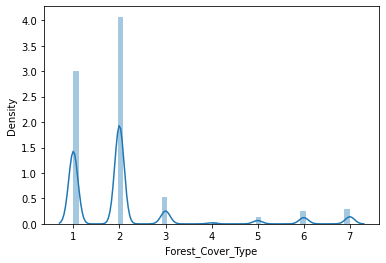

In [17]:
#Distribución de las clases de 'Forest_Cover_Type':

sns.distplot(raw_df['Forest_Cover_Type']) 

A priori parece que la clase 1 y 2 (Conífera/Abeto y Pino Lodgepole, respectivamente) tienen una mayor densidad de distribución que el resto de clases. Tiene más sentido hacer un countplot

2    256804
1    189314
3     33510
7     18583
6     16299
5      8675
4      2684
Name: Forest_Cover_Type, dtype: int64

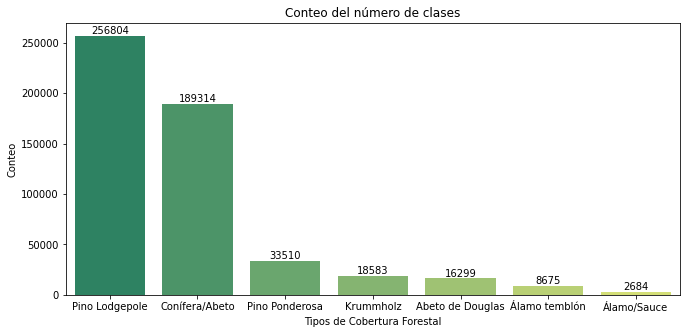

In [18]:
# Visualizar el conteo de cada clase de cobertura forestal
# Objetivo: saber si las clases están balanceadas

plt.figure(figsize=(11,5))

#Countplot en orden descendente:
fig = sns.countplot(x = raw_df['Forest_Cover_Type'], palette = "summer", order = raw_df['Forest_Cover_Type'].value_counts(ascending=False).index)

#Poner etiqueta del conteo en cada barra:
abs_values = raw_df['Forest_Cover_Type'].value_counts(ascending = False).values
fig.bar_label(container=fig.containers[0], labels=abs_values)

#Cambiar etiquetas del eje x por el nombre de las clases en vez del número:
types_name = ['Pino Lodgepole', 'Conífera/Abeto', 'Pino Ponderosa', 'Krummholz', 'Abeto de Douglas', 'Álamo temblón', 'Álamo/Sauce']
fig.set_xticklabels(types_name)

plt.xlabel("Tipos de Cobertura Forestal")
plt.ylabel("Conteo")
plt.title("Conteo del número de clases")

#Tabla resumen del conteo de cada clase:
raw_df['Forest_Cover_Type'].value_counts(ascending = False) 

In [28]:
# Alternativa al value_counts() para saber si el target está balanceado:
print(raw_df.groupby('Forest_Cover_Type').size()) 

Forest_Cover_Type
1    189314
2    256804
3     33510
4      2684
5      8675
6     16299
7     18583
dtype: int64


Las variables no están balanceadas. ¿Qué medidas tomar para analizar un dataset cuando las clases no están balanceadas? 

1. Recolectar más datos
2. Usar más métricas que no sean Accuracy. Accuracy no es muy fiable en estos casos. Hay otras más robustas como Confusion Matrix, Precision, Recall, F1 Scrore, curva ROC
3. Resampling de los datos de entrada al modelo: añadir copias de las instancias menos representadas (over-sampling) o eliminar instancias de las clases más representadas (under-sampling). Cuando hay muchos datos se recomienda usar under-sampling
4. Generar muestras sintéticas. Echar un vistazo al módulo “UnbalancedDataset” 
5. Probar diferentes algoritmos
6. Penalizar el modelo cuando hace errores (funciones de coste)

Se separan la 'X' e 'y'. Se aplican dos técnicas para balancear la target: SMOTE y RandomUnderSampler usando la librería 'imblearn'

In [19]:
X = raw_df.drop(['Forest_Cover_Type'], 1) #variables independientes
y = raw_df['Forest_Cover_Type'] #variable dependiente, a predecir

print(X.shape)
print(y.shape)

(525869, 54)
(525869,)


C:\Users\Luis\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


## Balanceo del target 

In [20]:
#Aplicar RandomUnderSampler()
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42) #undersample the majority class
X_unders, y_unders = undersample.fit_resample(X, y)

In [21]:
X_unders.shape
y_unders.shape

(18788,)

1    2684
2    2684
3    2684
4    2684
5    2684
6    2684
7    2684
Name: Forest_Cover_Type, dtype: int64

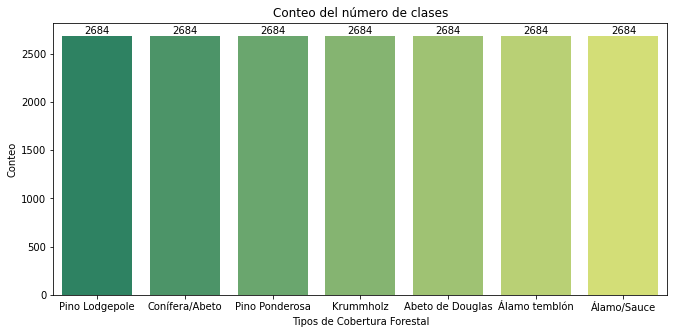

In [22]:
plt.figure(figsize=(11,5))

#Countplot en orden descendente:
fig = sns.countplot(x = y_unders, palette = "summer", order = y_unders.value_counts(ascending=False).index)

#Poner etiqueta del conteo en cada barra:
abs_values = y_unders.value_counts(ascending = False).values
fig.bar_label(container=fig.containers[0], labels=abs_values)

#Cambiar etiquetas del eje x por el nombre de las clases en vez del número:
types_name = ['Pino Lodgepole', 'Conífera/Abeto', 'Pino Ponderosa', 'Krummholz', 'Abeto de Douglas', 'Álamo temblón', 'Álamo/Sauce']
fig.set_xticklabels(types_name)

plt.xlabel("Tipos de Cobertura Forestal")
plt.ylabel("Conteo")
plt.title("Conteo del número de clases")

#Tabla resumen del conteo de cada clase:
y_unders.value_counts(ascending = False) 

In [23]:
#NOTA: tarda mucho en ejecutar. 
#Aplicar SMOTE()
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42) #oversample the minority class
X_overs, y_overs = oversample.fit_resample(X, y)

In [24]:
print(X_overs.shape)
y_overs.shape

(1797628, 54)


(1797628,)

5    256804
2    256804
1    256804
7    256804
3    256804
6    256804
4    256804
Name: Forest_Cover_Type, dtype: int64

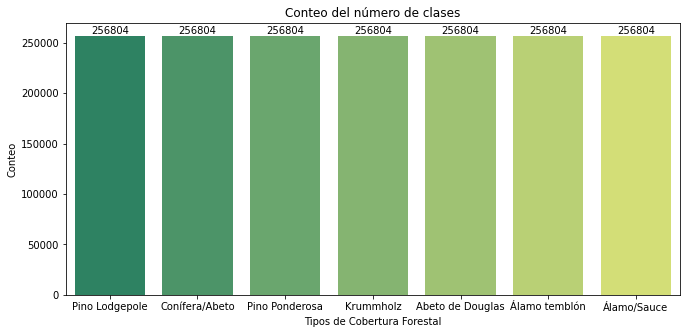

In [25]:
plt.figure(figsize=(11,5))

#Countplot en orden descendente:
fig = sns.countplot(x = y_overs, palette = "summer", order = y_overs.value_counts(ascending=False).index)

#Poner etiqueta del conteo en cada barra:
abs_values = y_overs.value_counts(ascending = False).values
fig.bar_label(container=fig.containers[0], labels=abs_values)

#Cambiar etiquetas del eje x por el nombre de las clases en vez del número:
types_name = ['Pino Lodgepole', 'Conífera/Abeto', 'Pino Ponderosa', 'Krummholz', 'Abeto de Douglas', 'Álamo temblón', 'Álamo/Sauce']
fig.set_xticklabels(types_name)

plt.xlabel("Tipos de Cobertura Forestal")
plt.ylabel("Conteo")
plt.title("Conteo del número de clases")

#Tabla resumen del conteo de cada clase:
y_overs.value_counts(ascending = False) 

## Separación de los datos en train y test 


Full Model - con los datos originales 

In [26]:
test_size = 0.20 #25 % de datos para el test
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = test_size, random_state = 42)

print('Dimensiones de X_train:', X_train.shape, '; Dimensiones de y_train:', y_train.shape)
print('Dimensiones de X_test:', X_test.shape, '; Dimensiones de y_test:', y_test.shape)

Dimensiones de X_train: (420695, 54) ; Dimensiones de y_train: (420695,)
Dimensiones de X_test: (105174, 54) ; Dimensiones de y_test: (105174,)


In [27]:
#Comprobar que el total sume la longitud del set de datos original
X_train.shape[0] + X_test.shape[0]

525869

RandomUnderSampler - con el target balanceado

In [50]:
test_size = 0.20 
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_unders,
                                                                    y_unders,
                                                                    test_size = test_size,
                                                                    random_state = seed)

SMOTE() - con el target balanceado

In [107]:
test_size = 0.20 
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_overs,
                                                                    y_overs,
                                                                    test_size = test_size,
                                                                    random_state = seed)

## **Estandarización de los datos:** 

In [51]:
#Estandarización:
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

## **Feature Selection:** 

Obtener la máxima información con el mínimo uso de recursos. Encontrar un modelo sencillo con menos variables que tenga un alto poder explicativo. Se aplican métodos de Feature Selection

**Random Forest Selection**
>> 


In [96]:
#Aplicar Random Forest Selection
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [100]:
print("Total precision: " + str(1 - np.count_nonzero(y_test - y_pred) / len(y_test - y_pred)))

Total precision: 0.9542852796318482


<AxesSubplot:title={'center':'Top 30 important features'}>

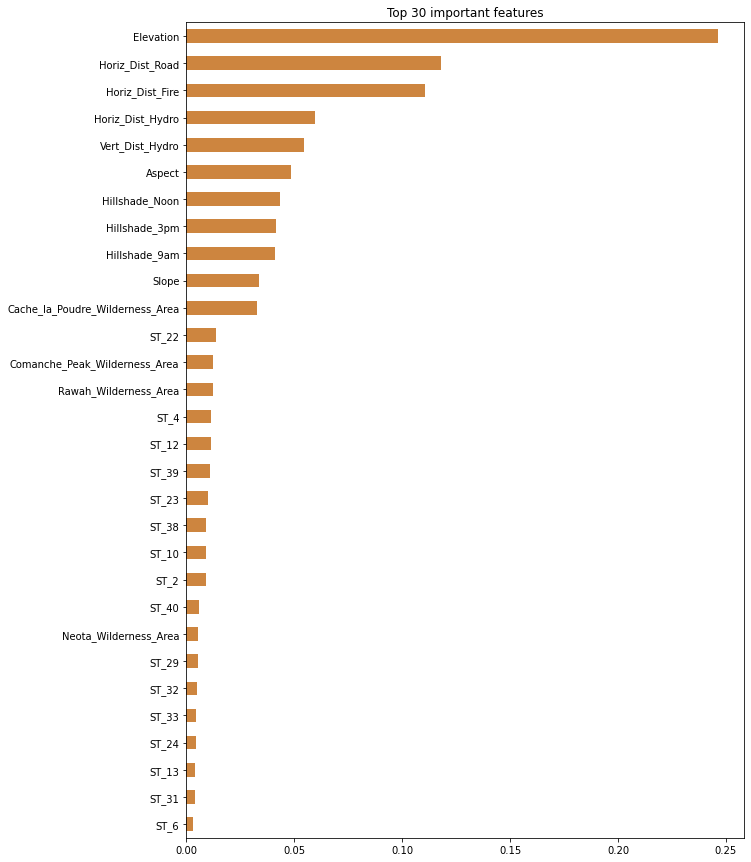

In [106]:
features = raw_df.drop(["Forest_Cover_Type"], axis = 1).columns

feat_importances = pd.Series(rf_clf.feature_importances_, index=features)

feat_importances.nlargest(30).iloc[::-1].plot(kind='barh', figsize=[10, 15], title="Top 30 important features", color ='peru')


Un criterio general es excluir las variables que tiene la Variable Importance más bajo. La regla general, sin embargo, es eliminar las variables que tienen una proporción de importancia inferior al 5 %, pero dado que solo tenemos 12 variables (o 54 atributos, debido a las variables categóricas), excluir 5 (VI por debajo del 5 %) de las 12 variables podría no ser una buena elección. Por lo tanto, establecemos nuestro propio criterio para excluir las variables que tienen el valor de VI más pequeño de todas las variables, que en nuestro caso es la variable 'Slope', pendiente.

**PCA**

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [75]:
pca = pca_pipe.named_steps['pca']
print('Porcentaje de varianza explicada por cada componente', pca.explained_variance_ratio_) #de las 54 columnas

Porcentaje de varianza explicada por cada componente [6.93088041e-02 5.41072133e-02 4.53521290e-02 3.74417221e-02
 2.78011380e-02 2.76192098e-02 2.27546852e-02 2.16353199e-02
 2.03976998e-02 1.99720034e-02 1.98539528e-02 1.97640884e-02
 1.94883138e-02 1.92460636e-02 1.91752039e-02 1.90751190e-02
 1.90016809e-02 1.89571990e-02 1.88962697e-02 1.88243527e-02
 1.87657129e-02 1.87518456e-02 1.87036408e-02 1.86735484e-02
 1.86554131e-02 1.86367919e-02 1.86265404e-02 1.85996410e-02
 1.85945425e-02 1.85891783e-02 1.85821618e-02 1.85765268e-02
 1.85602648e-02 1.85414574e-02 1.85348821e-02 1.85310192e-02
 1.85276235e-02 1.85228476e-02 1.85187491e-02 1.81107998e-02
 1.55152201e-02 1.49425308e-02 1.18390959e-02 1.15834597e-02
 8.46743232e-03 7.67222440e-03 5.27766618e-03 4.94736019e-03
 4.16411287e-03 2.77257954e-03 2.48357550e-03 5.93869946e-05
 2.98555900e-31 4.03351124e-32]


Text(0, 0.5, 'cumulative explained variance')

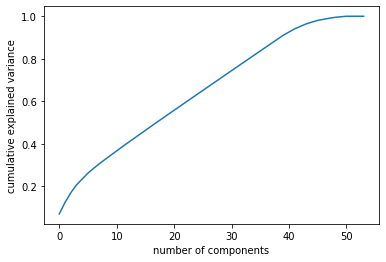

In [76]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [94]:
#coger todas las componentes que tengan un % de la varianza acumulada de 0.80 %. Eso es hasta la columna 33
np.cumsum(pca.explained_variance_ratio_) 

array([0.0693088 , 0.12341602, 0.16876815, 0.20620987, 0.23401101,
       0.26163022, 0.2843849 , 0.30602022, 0.32641792, 0.34638992,
       0.36624388, 0.38600797, 0.40549628, 0.42474234, 0.44391755,
       0.46299267, 0.48199435, 0.50095155, 0.51984782, 0.53867217,
       0.55743788, 0.57618973, 0.59489337, 0.61356692, 0.63222233,
       0.65085912, 0.66948566, 0.6880853 , 0.70667985, 0.72526902,
       0.74385119, 0.76242771, 0.78098798, 0.79952943, 0.81806432,
       0.83659534, 0.85512296, 0.87364581, 0.89216456, 0.91027536,
       0.92579058, 0.94073311, 0.9525722 , 0.96415566, 0.97262309,
       0.98029532, 0.98557298, 0.99052035, 0.99468446, 0.99745704,
       0.99994061, 1.        , 1.        , 1.        ])

Al usar una PCA como método para Feature Selection, no hay una respuesta clara sobre dónde se encuentra el límite de la varianza. Sin embargo, teniendo en cuenta que el número de componentes principales (PC) es de 54, muchos de ellos contribuyen de manera insignificante a la varianza proporcional. Se decide poner el umbral en el 80% de la varianza proporcional, lo que selecciona los primeros 33 componentes principales.

#### **Random Forest Classifier:**

In [23]:
#RandomForestClassifier - Full Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve


rnd_clf = RandomForestClassifier(random_state= 42, n_jobs = -1)
rnd_clf.fit(X_train, y_train)

#También se podría usar otros parámetros en el RandomForestClassifier pero al tardar tanto, no puedo probrar mucho

#Sería mejor hacer una cross-validation pero tarda muchísimo y lo acabo interrumpiendo


RandomForestClassifier(random_state=42)

Total accuracy: 0.9539049574990016
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     37855
           2       0.95      0.97      0.96     51440
           3       0.95      0.96      0.95      6698
           4       0.90      0.89      0.89       538
           5       0.94      0.75      0.83      1781
           6       0.94      0.90      0.92      3206
           7       0.97      0.95      0.96      3656

    accuracy                           0.95    105174
   macro avg       0.94      0.91      0.92    105174
weighted avg       0.95      0.95      0.95    105174



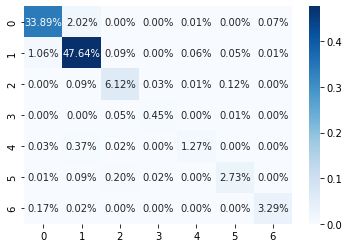

In [44]:
# RandomForestClassifier - metrics
y_pred_rf = rnd_clf.predict(X_test)
print("Total accuracy:", accuracy_score(y_test, y_pred_rf))

c_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

print(classification_report(y_test, y_pred_rf))

In [95]:
#Ya que se han obtenido muy buenos resultados en el RandomForest, me centro en crear el mejor clasificador.
# Busco los mejores parámetros, hago un cross-validation y pruebo con el target balanceado (X_unders, y_unders)

from sklearn.model_selection import GridSearchCV

rand_forest = RandomForestClassifier()

rand_forest_param = {
    'n_estimators': [400, 600, 800], 
    'max_features': [2, 4, 6]} 

gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv=10,
                         verbose=1,
                         n_jobs=-1)
                         
grids = {"gs_rand_forest": gs_rand_forest}

In [98]:
#X_train y_train vienen de X_unders, y_unders (RandomUnderSampler: minimiza las clases mayoritarias)
%%time
for i,j in grids.items():
    j.fit(X_train, y_train) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Wall time: 5min 40s


In [110]:
#X_train y_train vienen de X_overs, y_overs (SMOTE(): aumenta las clases minoritarias)

#NO EJECUTAR PORQUE COLAPSA A LOS 45 min. Se bloquea el ordenador y hay que cerrar todo.
#for i,j in grids.items():
#    j.fit(X_train, y_train) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [99]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids,
columns = ["Grid", "Best Score"]).sort_values("Best Score", ascending=False)
best_grids

Grid  Best Score
0  gs_rand_forest    0.866933

In [101]:
gs_rand_forest.best_estimator_

RandomForestClassifier(max_features=6, n_estimators=600)

In [102]:
#Ahora pruebo con los parámetros mejores:
rnd_clf_best = RandomForestClassifier(max_features=6, n_estimators=600, random_state= 42, n_jobs = -1)
rnd_clf_best.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_estimators=600, n_jobs=-1,
                       random_state=42)

In [104]:
#Y hago las predicciones:
y_pred_rf_best = rnd_clf_best.predict(X_test)
print("Total accuracy:", accuracy_score(y_test, y_pred_rf_best))
print(classification_report(y_test, y_pred_rf_best))

Total accuracy: 0.8714741883980841
              precision    recall  f1-score   support

           1       0.80      0.77      0.79       510
           2       0.80      0.69      0.74       516
           3       0.87      0.83      0.85       549
           4       0.94      0.98      0.96       568
           5       0.90      0.96      0.93       537
           6       0.83      0.87      0.85       537
           7       0.93      0.97      0.95       541

    accuracy                           0.87      3758
   macro avg       0.87      0.87      0.87      3758
weighted avg       0.87      0.87      0.87      3758



Como da un scoring tan bueno, no se hace la predicción con datos de entrada con reducción por PCA y Random Forest Selection

#### **Regresión logística**: 
>>> 
Se prueba con la Regresión Logística, un algoritmo de clasificación supervisada.Se aplica para multiclase ya que el algoritmo utiliza la estrategia (One vs Rest). Cada uno de los modelos da la probabilidad de pertenencia a cada clase. La clase ganadora de la predicción será la que tenga una mayor probabilidad.

**Full model** (sin reducción de dimensiones). Para ver cómo predice con los datos originales:

In [30]:
#LogisticRegression - Full Model
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


log_clf = linear_model.LogisticRegression(random_state= 42, n_jobs = -1) #max_iter = 1000; 10000
log_clf.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

Total accuracy: 0.7242189134196665
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     37855
           2       0.75      0.80      0.77     51440
           3       0.68      0.81      0.74      6698
           4       0.60      0.40      0.48       538
           5       0.11      0.00      0.01      1781
           6       0.48      0.25      0.33      3206
           7       0.72      0.58      0.64      3656

    accuracy                           0.72    105174
   macro avg       0.58      0.51      0.52    105174
weighted avg       0.71      0.72      0.71    105174



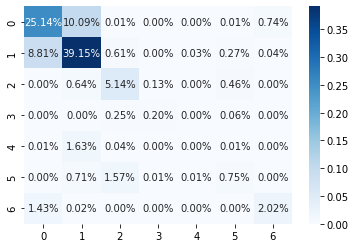

In [43]:
# LogisticRegression - metrics
y_pred_log = log_clf.predict(X_test)
print("Total accuracy:", accuracy_score(y_test, y_pred_log))

c_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

print(classification_report(y_test, y_pred_log))

Predicción con datos de entrada **con reducción de dimensiones por PCA**. Para ver si mejora

In [65]:
#PCA(33) para ver si mejora la LogisticRegression
X_PCA = X.iloc[:,:33] #las primeras 33 columnas
X_PCA.head()

Elevation  Aspect  Slope  Horiz_Dist_Hydro  Vert_Dist_Hydro  \
0       2596      51      3               258                0   
2       2804     139      9               268               65   
3       2785     155     18               242              118   
6       2606      45      7               270                5   
7       2605      49      4               234                7   

   Horiz_Dist_Road  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0              510            221             232            148   
2             3180            234             238            135   
3             3090            238             238            122   
6              633            222             225            138   
7              573            222             230            144   

   Horiz_Dist_Fire  ...  ST_10  ST_11  ST_12  ST_13  ST_14  ST_15  ST_16  \
0             6279  ...      0      0      0      0      0      0      0   
2             6121  ...      0      0      1      0      0      0      0   
3             6211  ...      0      0      0      0      0      0      0   
6             6256  ...      0      0      0      0      0      0      0   
7             6228  ...      0      0      0      0      0      0      0   

   ST_17  ST_18  ST_19  
0      0      0      0  
2      0      0      0  
3      0      0      0  
6      0      0      0  
7      0      0      0  

[5 rows x 33 columns]

In [66]:
test_size = 0.20 
seed = 7
X_train_pca, X_test_pca, y_train_pca, y_test_pca = model_selection.train_test_split(X_PCA, y, test_size = test_size, random_state = 42)

#Ahora el dataset tiene 33 columnas
print('Dimensiones de X_train:', X_train_pca.shape, '; Dimensiones de y_train:', y_train_pca.shape)
print('Dimensiones de X_test:', X_test_pca.shape, '; Dimensiones de y_test:', y_test_pca.shape)

Dimensiones de X_train: (420695, 33) ; Dimensiones de y_train: (420695,)
Dimensiones de X_test: (105174, 33) ; Dimensiones de y_test: (105174,)


In [67]:
#Estandarización:
std_scale = preprocessing.StandardScaler().fit(X_train_pca)

X_train_pca_std = std_scale.transform(X_train_pca)
X_test_pca_std = std_scale.transform(X_test_pca)

In [68]:
#LogisticRegression con datos de entrada de PCA
log_clf_pca = linear_model.LogisticRegression(random_state= 42, n_jobs = -1) #max_iter = 1000; 10000
log_clf_pca.fit(X_train_pca_std, y_train_pca)

LogisticRegression(n_jobs=-1, random_state=42)

Total accuracy: 0.7132466198870443
              precision    recall  f1-score   support

           1       0.69      0.71      0.70     37855
           2       0.75      0.79      0.77     51440
           3       0.67      0.81      0.74      6698
           4       0.60      0.38      0.47       538
           5       0.12      0.00      0.01      1781
           6       0.48      0.24      0.32      3206
           7       0.64      0.39      0.48      3656

    accuracy                           0.71    105174
   macro avg       0.56      0.47      0.50    105174
weighted avg       0.70      0.71      0.70    105174



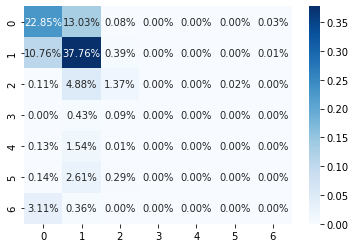

In [71]:
# LogisticRegression - metrics con datos de entrada de PCA
y_pred_log_pca = log_clf_pca.predict(X_test_pca_std)
print("Total accuracy:", accuracy_score(y_test_pca, y_pred_log_pca))

c_matri_pca = confusion_matrix(y_test_pca, y_pred_log_pca)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

print(classification_report(y_test_pca, y_pred_log_pca))

Predicción con datos de entrada **con reducción de variables mediante Variable Importance de Random Forest Selection**. Para ver si mejora

In [76]:
#Dataset Selection Random Forest
X_rf = X.drop(['Slope'], 1)

C:\Users\Luis\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [80]:
X_rf.columns #asegurar que no está Slope ni Forest_Cover_Type

Index(['Elevation', 'Aspect', 'Horiz_Dist_Hydro', 'Vert_Dist_Hydro',
       'Horiz_Dist_Road', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horiz_Dist_Fire', 'Rawah_Wilderness_Area', 'Neota_Wilderness_Area',
       'Comanche_Peak_Wilderness_Area', 'Cache_la_Poudre_Wilderness_Area',
       'ST_1', 'ST_2', 'ST_3', 'ST_4', 'ST_5', 'ST_6', 'ST_7', 'ST_8', 'ST_9',
       'ST_10', 'ST_11', 'ST_12', 'ST_13', 'ST_14', 'ST_15', 'ST_16', 'ST_17',
       'ST_18', 'ST_19', 'ST_20', 'ST_21', 'ST_22', 'ST_23', 'ST_24', 'ST_25',
       'ST_26', 'ST_27', 'ST_28', 'ST_29', 'ST_30', 'ST_31', 'ST_32', 'ST_33',
       'ST_34', 'ST_35', 'ST_36', 'ST_37', 'ST_38', 'ST_39', 'ST_40'],
      dtype='object')

In [79]:
test_size = 0.20 #25 % de datos para el test
seed = 7
X_train_rf, X_test_rf, y_train_rf, y_test_rf = model_selection.train_test_split(X_rf, y, test_size = test_size, random_state = 42)

#Ahora el dataset tiene 33 columnas
print('Dimensiones de X_train:', X_train_rf.shape, '; Dimensiones de y_train:', y_train_rf.shape)
print('Dimensiones de X_test:', X_test_rf.shape, '; Dimensiones de y_test:', y_test_rf.shape)

Dimensiones de X_train: (420695, 53) ; Dimensiones de y_train: (420695,)
Dimensiones de X_test: (105174, 53) ; Dimensiones de y_test: (105174,)


In [83]:
#Estandarización:
std_scale = preprocessing.StandardScaler().fit(X_train_rf)

X_train_rf_std = std_scale.transform(X_train_rf)
X_test_rf_std = std_scale.transform(X_test_rf)

In [86]:
#LogisticRegression con datos de entrada de PCA
log_clf_rf = linear_model.LogisticRegression(random_state= 42, n_jobs = -1) #max_iter = 1000; 10000
log_clf_rf.fit(X_train_rf_std, y_train_rf)

LogisticRegression(n_jobs=-1, random_state=42)

Total accuracy: 0.7239812120866373
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     37855
           2       0.75      0.80      0.77     51440
           3       0.68      0.80      0.73      6698
           4       0.58      0.39      0.47       538
           5       0.13      0.00      0.01      1781
           6       0.48      0.26      0.34      3206
           7       0.72      0.58      0.65      3656

    accuracy                           0.72    105174
   macro avg       0.58      0.51      0.52    105174
weighted avg       0.71      0.72      0.71    105174



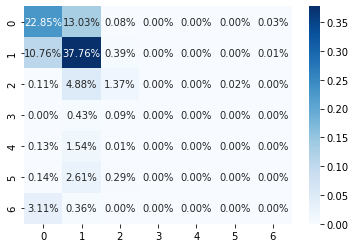

In [88]:
# LogisticRegression - metrics con datos de entrada de PCA
y_pred_log_rf = log_clf_rf.predict(X_test_rf_std)
print("Total accuracy:", accuracy_score(y_test_rf, y_pred_log_rf))

c_matri_pca = confusion_matrix(y_test_rf, y_pred_log_rf)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

print(classification_report(y_test_rf, y_pred_log_rf))

#### **Árboles de Decisión**
Algoritmo en el que se divide el espacio muestral con la variable más predictiva (la que mejor separa los datos). Tras esta división, el árbol se vuelve a dividir en el siguiente nivel con la variable que mejor separa los datos del nodo.

Y así, hasta que se alcanza un criterio de parada:
1- Están todos los elementos clasificados perfectamente (WARNING)
2- No puede encontrar una división que reduzca la impureza del nodo.
3- El árbol alcanza un tamaño predefinido.

Los árboles de decisión hacen muy pocas suposiciones sobre los datos de entrenamiento, a diferencia de los modelos lineales, que asumen que los datos tienen una relación lineal, por ejemplo. 
Por lo tanto, la estructura del modelo es libre para ajustarse todo lo posible a los datos de entrenamiento. Si no se limita la dimensión del árbol, se producirá muy probablemente overfitting.



In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

parameters = {'max_depth': [2,3,4,5,6,7], 'min_samples_leaf': np.arange(1,7)}

grid_tree = GridSearchCV(tree, parameters, scoring = 'accuracy', cv = 5) #cross validation. Usando CV, la métrica es más realista

grid_tree.fit(X_train, y_train) #Full model. Datos originales estandarizados
print(grid_tree.best_score_) #¿cual es la accuracy más alta?
print(grid_tree.best_params_) #con qué parámetros?

0.7312399719511761
{'max_depth': 7, 'min_samples_leaf': 5}


In [37]:
#En la celda anterior da los parámetros del mejor scoring, se aplican ahora: 
tree = DecisionTreeClassifier(max_depth = 7, min_samples_leaf= 1, random_state = 42) 
tree.fit(X_train, y_train)

tree_predictions = tree.predict(X_test)
accuracy_score(y_test, tree_predictions) 

0.7340692566603914

#### **KNN** 

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train) #Full model. Datos originales estandarizados

KNeighborsClassifier(n_neighbors=7)

In [49]:
#Interrumpo porque tarda en exceso. #Full model. Pruebo debajo a hacerlo con el target balanceado por RandomUnderSampler
#prediction = knn.predict(X_test) 

#print(classification_report(y_test, prediction))

In [52]:
#Pruebo a hacerlo con el target balanceado por RandomUnderSampler 
from sklearn.metrics import classification_report, accuracy_score
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train, y_train) #viene de X_unders, y_unders
prediction = knn.predict(X_test) 

print(accuracy_score(y_test, prediction)) 
print(classification_report(y_test, prediction))

0.7841937200638638
              precision    recall  f1-score   support

           1       0.70      0.65      0.67       510
           2       0.68      0.56      0.61       516
           3       0.80      0.66      0.72       549
           4       0.87      0.96      0.91       568
           5       0.79      0.91      0.85       537
           6       0.72      0.79      0.75       537
           7       0.89      0.93      0.91       541

    accuracy                           0.78      3758
   macro avg       0.78      0.78      0.78      3758
weighted avg       0.78      0.78      0.78      3758

